In [80]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [81]:
# Function to load MRI images
def load_mri_images(subject_number):
    base_dir = '/gpfs/scratch/pa2297/Dataset/BraTS2021_Test'
    folder_name = f"BraTS2021_{subject_number:05d}"
    images = {}
    
    for img_type in ['flair', 't1', 't1ce', 't2']:
        file_path = os.path.join(base_dir, folder_name, f"{folder_name}_{img_type}.nii.gz")
        if os.path.exists(file_path):
            images[img_type] = nib.load(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return images

In [82]:
subject_number = 636  # Replace this with the actual subject number you want to access
data = load_mri_images(subject_number)

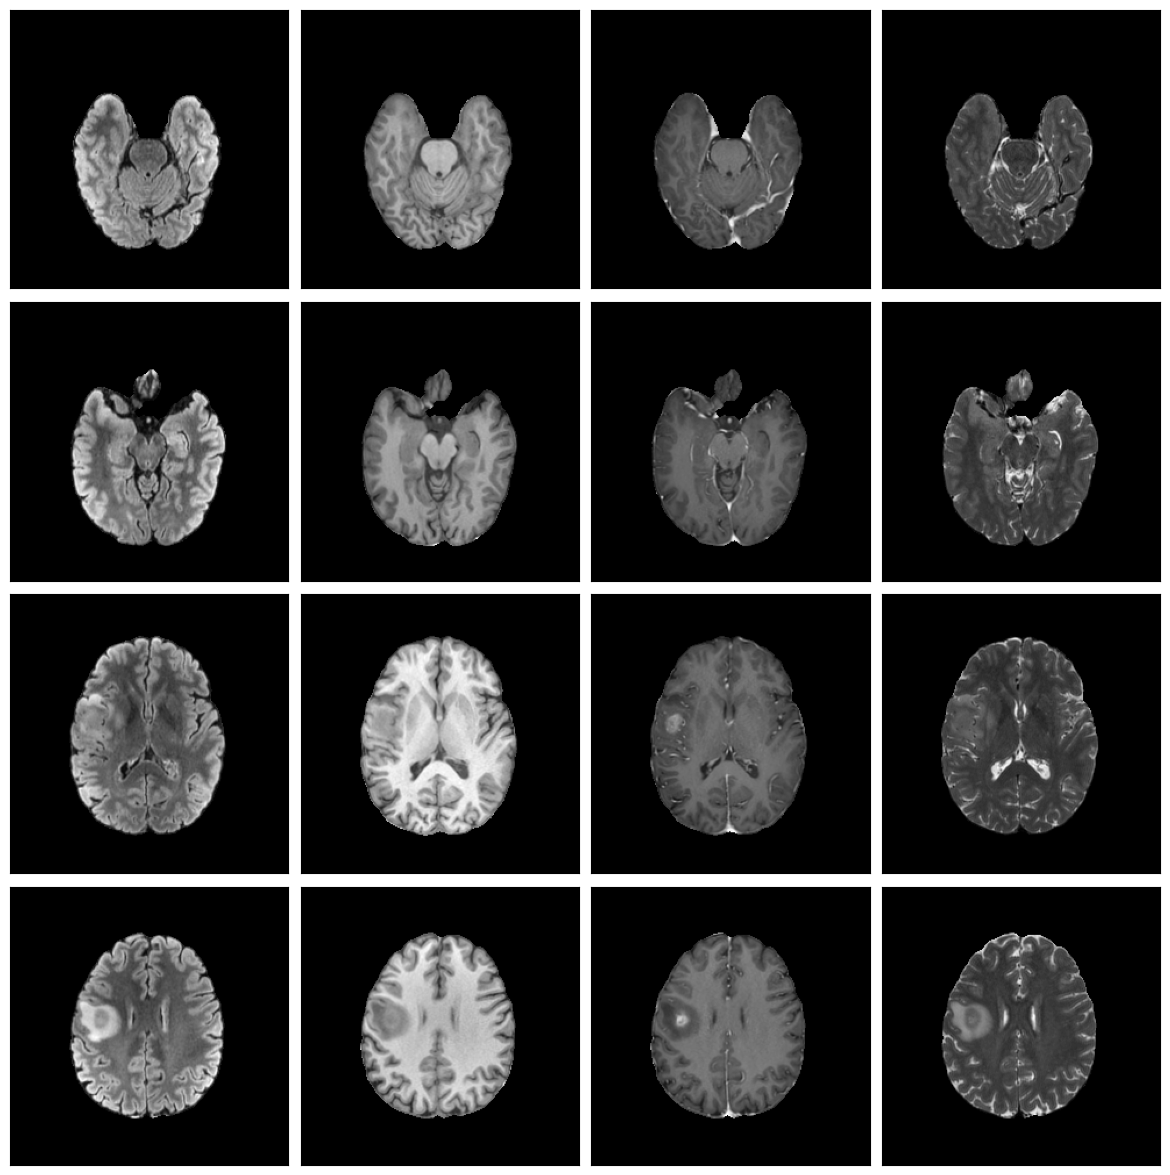

In [83]:
import numpy as np
import matplotlib.pyplot as plt

images = {
    'T2-FLAIR': data['flair'].get_fdata(),
    'T1-weighted': data['t1'].get_fdata(),
    'T1Gd': data['t1ce'].get_fdata(),
    'T2-weighted': data['t2'].get_fdata()
}


slice_indices = [50, 60, 80, 100]

# Number of rows is the number of slice indices, and the number of columns is 4 (one for each image type)
fig, axes = plt.subplots(len(slice_indices), len(images), figsize=(15, 15))

# Loop through each slice index and create a row of subplots for it
for row, slice_index in enumerate(slice_indices):
    for col, (key, image) in enumerate(images.items()):
        # Select the appropriate slice from the image volume
        image_slice = image[:, :, slice_index]
        # Rotate the image slice 90 degrees clockwise
        rotated_image = np.rot90(image_slice, k=-1)
        # Decide which axes to use for the current subplot
        ax = axes[row, col]
        im = ax.imshow(rotated_image, cmap='gray')
        # Set the title for the top row to the image type
        # Remove tick labels for cleanliness
        ax.set_xticks([])
        ax.set_yticks([])

# Adjust layout to prevent overlap with custom spacing
fig.subplots_adjust(wspace=0.0, hspace=0.05)

plt.show()



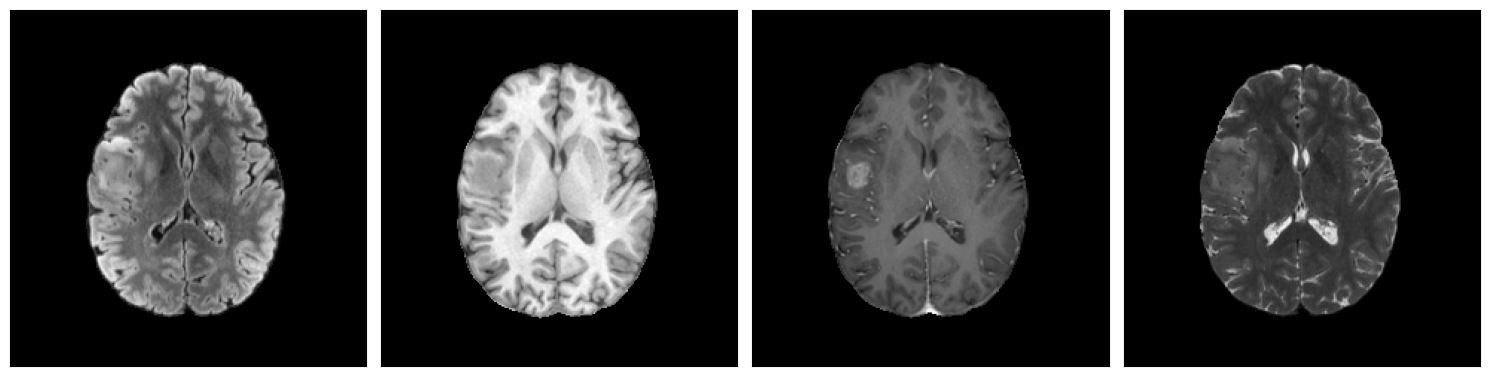

In [84]:
import numpy as np
import matplotlib.pyplot as plt

images = {
    'T2-FLAIR': data['flair'].get_fdata(),
    'T1-weighted': data['t1'].get_fdata(),
    'T1Gd': data['t1ce'].get_fdata(),
    'T2-weighted': data['t2'].get_fdata()
}

slice_index = 81

# Create a figure 
fig, axes = plt.subplots(1, 4, figsize=(15, 8)) 

# Loop through each image and plot it in a subplot
for i, (key, image) in enumerate(images.items()):
    # Assuming images are 2D, we take the middle slice if they are 3D
    image_slice = image[:, :, slice_index]
    # Rotate the image slice 90 degrees clockwise
    rotated_image = np.rot90(image_slice, k=-1)
    ax = axes[i]
    im = ax.imshow(rotated_image, cmap='gray')
    # ax.set_title(key, fontweight='bold')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Optional: Remove the ticks as well
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
def load_constraint_map(subject_number, base_dir):
    folder_name = f"BraTS2021_{subject_number:05d}"
    mat_file_path = os.path.join(base_dir, folder_name, 'Constraint_map_20.mat')
    
    if os.path.exists(mat_file_path):
        data = loadmat(mat_file_path)
        print(f"Successfully loaded {mat_file_path}")
        return data
    else:
        print(f"File not found: {mat_file_path}")
        return None

In [22]:
dir2 = '/gpfs/scratch/pa2297/CM/t1-t2-tce-flair/Constraint_Maps'
cluster2 = load_constraint_map(subject_number, dir2)
map2 = cluster2['param']

Successfully loaded /gpfs/scratch/pa2297/CM/t1-t2-tce-flair/Constraint_Maps/BraTS2021_00709/Constraint_map_20.mat


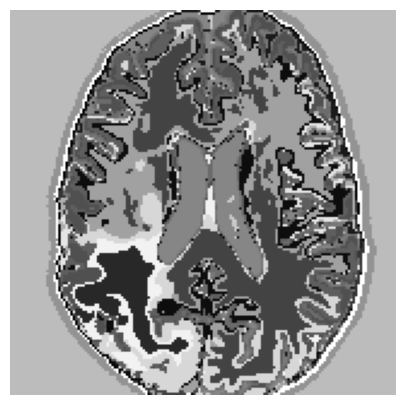

In [23]:
import matplotlib.pyplot as plt

# Assuming map2 and slice_index are defined as per your context
fig, ax = plt.subplots(figsize=(10, 5))

# Plot T1 channel
ax.imshow(map2[:, :, slice_index], cmap='gray')
# ax.set_title('CM: t2, flair')
ax.axis('off')  # This will remove the axis

plt.show()

In [ ]:
slice_index = 100
crop_margin = 30  # This number of pixels will be removed from each edge


In [ ]:
filtered_images = {key: images[key] for key in ['T1-weighted', 'T1Gd']}

# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed

# Loop through the filtered image dictionary and plot
for i, (key, image) in enumerate(filtered_images.items()):
    # Assuming images are 2D, we take the middle slice if they are 3D
    image_slice = image[:, :, slice_index]
    # Crop the image slice
    cropped_image = image_slice[crop_margin:-crop_margin, crop_margin:-crop_margin]

     # Rotate the cropped image slice 90 degrees clockwise
    rotated_image = np.rot90(cropped_image, k=-1)
    ax = axes[i]
    im = ax.imshow(rotated_image, cmap='gray')
    # ax.set_title(key, fontweight='bold')
    
    # Removing labels and ticks from the axes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [1]:
import sys
import h5py 
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import tensorflow as tf
import scipy.io as sio



sys.path.append('/gpfs/scratch/pa2297/CCL-Synthetis/')


import Synthesis.synth_config as cfg

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2ax4qr6g because the default path (/gpfs/home/pa2297/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
2024-05-06 12:42:19.249373: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 12:42:20.367685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 12:42:20.368732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 12:42:29.439666: W tensorflow/compile

In [ ]:
# # Load the model
# model_ = modelObj(cfg)

In [ ]:
# # Load the trained weights
# # Loss 5 RELU
# # Baseline
# weights_base = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _baseline/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# # CL - Full decoder
# weights_full = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _CL_full_dec_warm/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# # partial
# weights_part = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _CL_partial_dec_warm/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# #---------

In [ ]:
# # Load the trained weights
# # Loss 5 RELU
# # Baseline
# weights_base = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _baseline/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# # CL - Full decoder
# weights_full = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _CL_full_dec_warm/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# # partial
# weights_part = '/gpfs/scratch/pa2297/Training/t1-t2-flair/RelU/Loss/brats_t1_t2_flair_loss5/rand_deform/finetune_Hybride _CL_partial_dec_warm/t1_t2_flair_loss5_tr1_Hybride/tr_comb_Exp1_LR_ft_0.01/weights_20Final.hdf5'
# #---------

In [ ]:
# # Load model
# model_base = model_.synth_unet()
# model_full = model_.synth_unet()
# model_part = model_.synth_unet()

# # Feed weights to the network
# model_full.load_weights(weights_full)
# model_base.load_weights(weights_base)
# model_part.load_weights(weights_part)

In [13]:
'''Loading Test subject'''

sys.path.append('/gpfs/scratch/pa2297/multi-contrast-contrastive-learning/')

from utils.utils import myCrop3D
from utils.utils import contrastStretch
from skimage import exposure



In [210]:
def normalize_img_zmean(img, mask):
    ''' Zero mean unit standard deviation normalization based on a mask'''
    mask_signal = img[mask>0]
    mean_ = mask_signal.mean()
    std_ = mask_signal.std()
    img = (img - mean_ )/ std_
    return img, mean_, std_

def normalize_img(img):
    img = (img - img.min())/(img.max()-img.min())
    return img



def load_subject(datadir, subName):
    data_suffix = ['_t1ce.nii.gz', '_t2.nii.gz', '_t1.nii.gz', '_flair.nii.gz']
    sub_img = []
    mask = None
    for suffix in data_suffix:
        img_path = f"{datadir}{subName}/{subName}{suffix}"
        img_data = nib.load(img_path).get_fdata()
        img_data = np.rot90(img_data, -1)
        img_data = myCrop3D(img_data, (192,192))

        if mask is None:  
            mask = np.zeros(img_data.shape)
            mask[img_data > 0] = 1
        
        img_data = contrastStretch(img_data, mask, 0.01, 99.9)
        # img_data, mean_, std_ = normalize_img_zmean(img_data, mask)
        img_data = normalize_img(img_data)
        sub_img.append(img_data)
    
    sub_img = np.stack(sub_img, axis=-1)
    sub_img = np.transpose(sub_img, (2,0,1,3))  # Adjust dimensions as needed
    sub_img = sub_img[40:120]  # Assuming your volume z-axis slice range
    print(sub_img.shape)

    
    return sub_img

# Example usage
datadir = "/gpfs/scratch/pa2297/Dataset/BraTS2021_Test/"
subName = 'BraTS2021_01201'  # Replace with actual subject names retrieval logic
#1194
img = load_subject(datadir, subName)
 

(80, 192, 192, 4)


In [211]:
# Loading the test set

def get_data(img, contrast_idx, target_contrast_idx):
    """Returns tuple (input, target) correspond to sample #idx."""
    x_train = generate_X(img, contrast_idx)
    y_train = generate_Y(img, target_contrast_idx)
    return tf.identity(x_train), tf.identity(y_train)
        
def generate_X(img, contrast_idx):    
    X = img[..., contrast_idx]
    return X
    
def generate_Y(img, target_contrast_idx):    
    Y = img[..., target_contrast_idx] 
    return Y

a,b = get_data(img, cfg.contrast_idx, cfg.target_contrast_idx)


In [212]:
def load_predictions(predictions_file):
    data = sio.loadmat(predictions_file)
    return data

predictions_file = '/gpfs/scratch/pa2297/CCL-Predictions/relu-zmeanoff/'+subName+'_predictions.mat'
#Flair10-loss5
data = load_predictions(predictions_file)

predictions = {
    'Baseline': data['predictions']['Baseline'][0, 0],
    'Partial_Decoder': data['predictions']['Partial_Decoder'][0, 0],
    'Full_Decoder': data['predictions']['Full_Decoder'][0, 0]
}


In [213]:
def plot_model_predictions(predictions, slice_index, original_img=None):
    # Determine the number of subplots based on whether there's an original image
    num_models = len(predictions)
    if original_img is not None:
        num_models += 1
    
    # Set up the plotting figure
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))
    
    # Plot original image first if provided
    if original_img is not None:
        axes[0].imshow(original_img[slice_index, :, :,0], cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')
    
    # Plot each model's prediction
    for i, (model_name, model_prediction) in enumerate(predictions.items(), start=1 if original_img is not None else 0):
        axes[i].imshow(model_prediction[slice_index, :, :,0], cmap='gray')
        axes[i].set_title(model_name)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [9]:
# def plot_single_prediction(model_name, model_prediction, slice_index, title_prefix=''):
#     plt.figure(figsize=(5, 5))
#     plt.imshow(model_prediction[slice_index, :, :, 0], cmap='gray')
#     plt.title(f'{title_prefix}{model_name}')
#     plt.axis('off')
#     plt.show()

# # Assuming 'predictions' is a dictionary of your images, 'slice_index' is the index of the slice
# original_img = b   # Replace with your actual 3D image array

# # Example slice index to display
# slice_index = 40
# # If there is an original image to plot first, plot it
# if original_img is not None:
#     plot_single_prediction('Original', original_img, slice_index)

# # Now plot each model's prediction separately
# for model_name, model_prediction in predictions.items():
#     plot_single_prediction(model_name, model_prediction, slice_index)


In [8]:
b.shape

TensorShape([80, 192, 192, 2])

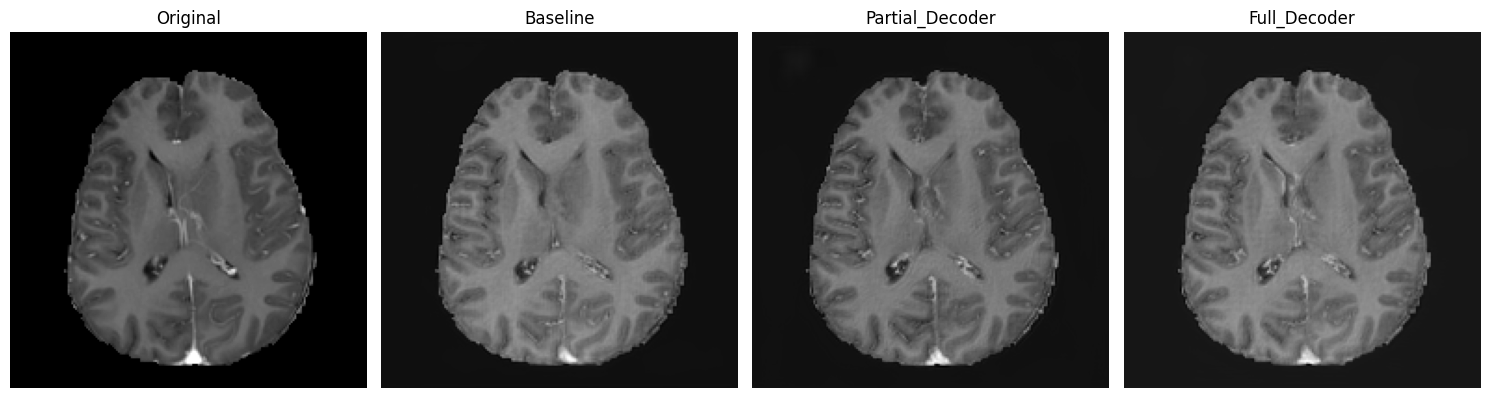

In [218]:
# Assume you have a 3D array for the original image
original_img = b   # Replace with your actual 3D image array

# Example slice index to display
slice_index = 40
#15

# Plot predictions
plot_model_predictions(predictions, slice_index, original_img=original_img)

In [166]:
def plot_model_predictions2(predictions, slice_index, original_img=None):
    # Determine the number of subplots based on whether there's an original image
    num_models = len(predictions)
    if original_img is not None:
        num_models += 1
    
    # Set up the plotting figure
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))
    
    # Plot original image first if provided
    if original_img is not None:
        axes[0].imshow(original_img[slice_index, :, :,1], cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')
    
    # Plot each model's prediction
    for i, (model_name, model_prediction) in enumerate(predictions.items(), start=1 if original_img is not None else 0):
        axes[i].imshow(model_prediction[slice_index, :, :,1], cmap='gray')
        axes[i].set_title(model_name)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [80]:
# slice_index = 25
# # Plot predictions
# plot_model_predictions2(predictions, slice_index, original_img=original_img)

In [167]:
import scipy.io as sio
import matplotlib.pyplot as plt

def load_predictions(predictions_file):
    data = sio.loadmat(predictions_file)
    return {
        'Baseline': data['predictions']['Baseline'][0, 0],
        'Partial_Decoder': data['predictions']['Partial_Decoder'][0, 0],
        'Full_Decoder': data['predictions']['Full_Decoder'][0, 0]
    }

# File paths for each scenario
# predictions_file1 = f'/gpfs/scratch/pa2297/CCL-Predictions/relu-zmeanoff/{subName}_predictions.mat'
# predictions_file2 = f'/gpfs/scratch/pa2297/CCL-Predictions/updated_loss5/{subName}_predictions.mat'
predictions_file3 = f'/gpfs/scratch/pa2297/CCL-Predictions/ReLU350-PLoss5/{subName}_predictions.mat'

# Load predictions for each scenario
# predictions1 = load_predictions(predictions_file1)
# predictions2 = load_predictions(predictions_file2)
predictions3 = load_predictions(predictions_file3)


In [168]:
def plot_model_predictions3(multiple_predictions, slice_index, original_img=None):
    scenarios = len(multiple_predictions)
    num_models = len(multiple_predictions[0]) + (1 if original_img is not None else 0)
    
    fig, axes = plt.subplots(scenarios, num_models, figsize=(13, 10))
    
    for scenario_idx, predictions in enumerate(multiple_predictions):
        # Plot original image first if provided
        if original_img is not None:
            ax = axes[scenario_idx, 0] if scenarios > 1 else axes[0]
            ax.imshow(original_img[slice_index, :, :, 0], cmap='gray')
            # ax.set_title('Original')
            ax.axis('off')
        
        # Plot each model's prediction
        for i, (model_name, model_prediction) in enumerate(predictions.items(), start=1 if original_img is not None else 0):
            ax = axes[scenario_idx, i] if scenarios > 1 else axes[i]
            ax.imshow(model_prediction[slice_index, :, :, 0], cmap='gray')
            # ax.set_title(f'{model_name}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()


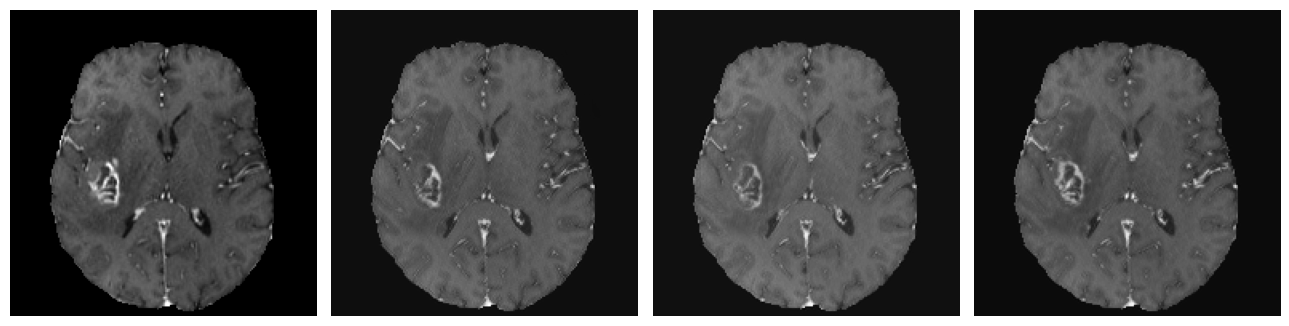

In [175]:
# Assume you have a 3D array for the original image
original_img = b  # Replace with your actual 3D image array

# Example slice index to display
slice_index = 29

# List of predictions for each scenario
all_predictions = [predictions3]

# Plot predictions for each scenario
plot_model_predictions3(all_predictions, slice_index, original_img=original_img)


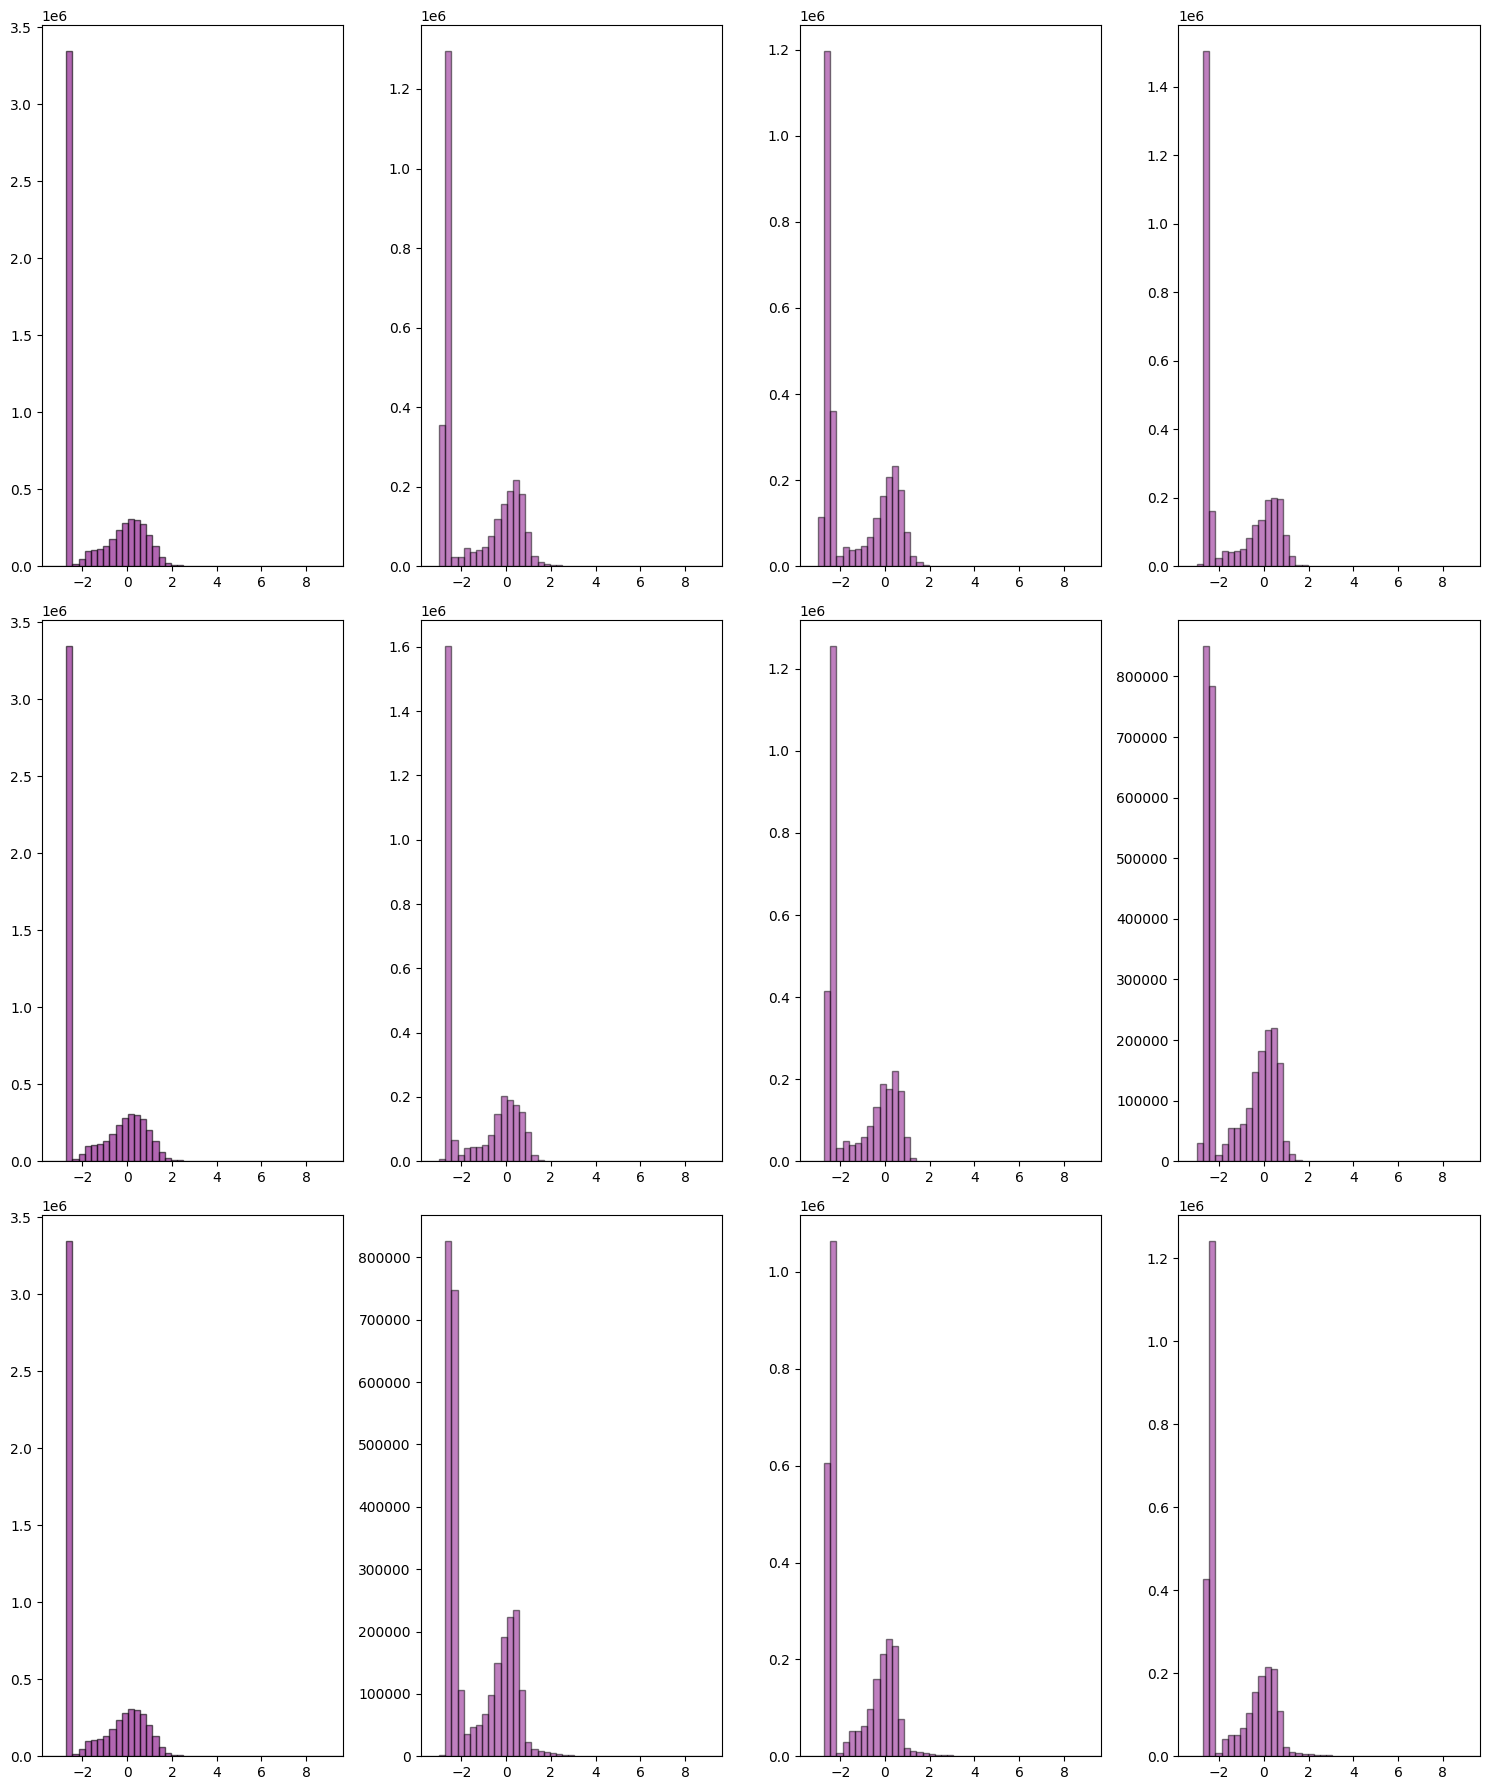

In [28]:
tf.experimental.numpy.experimental_enable_numpy_behavior()
# Original image flattened
original_flat_data = b.numpy().flatten()


fig, axes = plt.subplots(3, 4, figsize=(15, 18))  # Adjust the figure size as needed

# Assuming b is a TensorFlow tensor, convert it to a numpy array and flatten it
original_flat_data = b.numpy().flatten()

# Determine the common axis range for all histograms
# You can define these limits based on the data, or use min and max to set them dynamically
data_min = min(original_flat_data.min(), *[model_prediction.flatten().min() for predictions in all_predictions for model_prediction in predictions.values()])
data_max = max(original_flat_data.max(), *[model_prediction.flatten().max() for predictions in all_predictions for model_prediction in predictions.values()])
common_bins = np.linspace(data_min, data_max, num=50)  # for example, 50 bins

# Column titles for the models
column_titles = ['Original', 'Baseline', 'Partial_Decoder', 'Full_Decoder']

# Row titles for MSE, MAE, Perceptual
row_titles = ['MSE', 'MAE', 'Perceptual']

colors = ['lightpink', 'lightblue', 'plum']  # light purple is referred to as 'plum'

# Iterate over all predictions and plot combined histograms with different colors for each row
for row, predictions in enumerate(all_predictions):
    # Set the row label (MSE, MAE, Perceptual)
    axes[row, 0].set_ylabel(row_titles[row], fontsize=14, fontweight='bold', labelpad=10)
    
    # Plot histogram for original image in the first column with the row's color
    axes[row, 0].hist(original_flat_data, bins=common_bins, color=colors[row], edgecolor='black', alpha=0.7)
    # axes[row, 0].set_title('Original', fontsize=12, fontweight='bold')
    axes[row, 0].set_xlim([data_min, data_max])
    
    # Plot histograms for each model prediction with the row's color
    for col, (model_name, model_prediction) in enumerate(predictions.items(), start=1):
        # Flatten the 3D data to 1D for histogramming
        flat_data = model_prediction.flatten()
        ax = axes[row, col]
        ax.hist(flat_data, bins=common_bins, color=colors[row], edgecolor='black', alpha=0.7)
        ax.set_xlim([data_min, data_max])
        
        # Set the titles for the top row
        # if row == 0:
        #     ax.set_title(column_titles[col], fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [871]:
import pandas as pd

# Define the structure of your data
losses = ['0.5', '1', '5']
activation_functions = ['Tanh', 'ReLU']
model_types = ['Full', 'Partial', 'Base']
metrics = ['SSIM', 'MSE', 'PSNR']

# Define your data here
data_values = [
    # Tanh with loss 0.5
    0.7536583601, 0.1744980805, 27.17833747, 0.7520856277, 0.173872434, 26.73768156, 0.7549136693, 0.1713460488, 26.96786328,
    # ReLU with loss 0.5
    0.7203458338, 0.1997622443, 26.31279744, 0.7335465185, 0.1952935145, 26.53728399, 0.7387031326, 0.1978974433, 27.03942442,
    # Tanh with loss 1
    0.7500364195, 0.1735580213, 26.89563598, 0.7498685557, 0.1772350427, 26.97720457, 0.7527416593, 0.1768743119, 27.16005238,
    # ReLU with loss 1
    0.7580924044, 0.173131058, 27.62234102, 0.7484357358, 0.1790515307, 26.92025428, 0.7605378257, 0.176496753, 27.68506806,
    # Tanh with loss 5
    0.7526984723, 0.1694834676, 26.83330376, 0.7464487818, 0.1758241047, 27.02911757, 0.7517990612, 0.1707917475, 27.13706046,
    # ReLU with loss 5
    0.7553585593, 0.1759219215, 27.40991164, 0.7474588128, 0.1733037029, 27.0468697, 0.7494221124, 0.1756911141, 27.03898614,
]

# Generate a list of tuples for every combination of model type, activation function, and loss
data = []
for loss in losses:
    for activation in activation_functions:
        for i, model_type in enumerate(model_types):
            for metric in metrics:
                data.append({
                    'Loss': loss,
                    'Activation': activation,
                    'Model_Type': model_type,
                    'Metric': metric,
                    'Value': data_values.pop(0)  # Pop the first element from the data_values list
                })

# Now create the DataFrame
df = pd.DataFrame(data)

# Check the DataFrame
print(df.head())

# Continue with plotting the bar chart using this structured DataFrame


  Loss Activation Model_Type Metric      Value
0  0.5       Tanh       Full   SSIM   0.753658
1  0.5       Tanh       Full    MSE   0.174498
2  0.5       Tanh       Full   PSNR  27.178337
3  0.5       Tanh    Partial   SSIM   0.752086
4  0.5       Tanh    Partial    MSE   0.173872


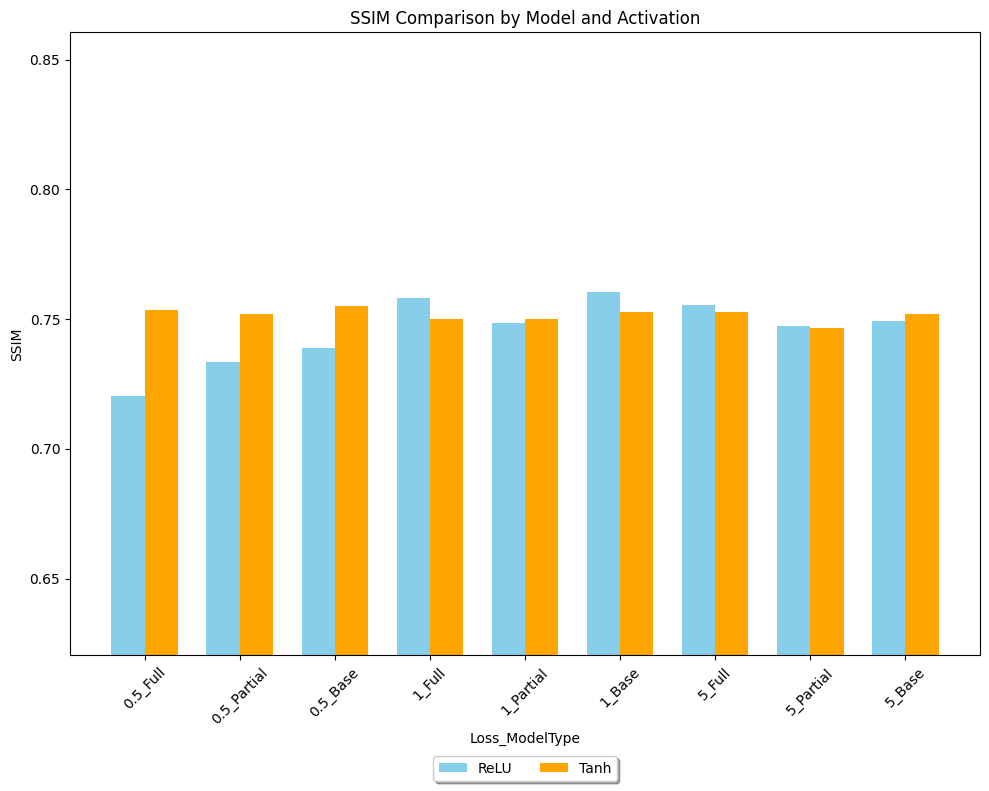

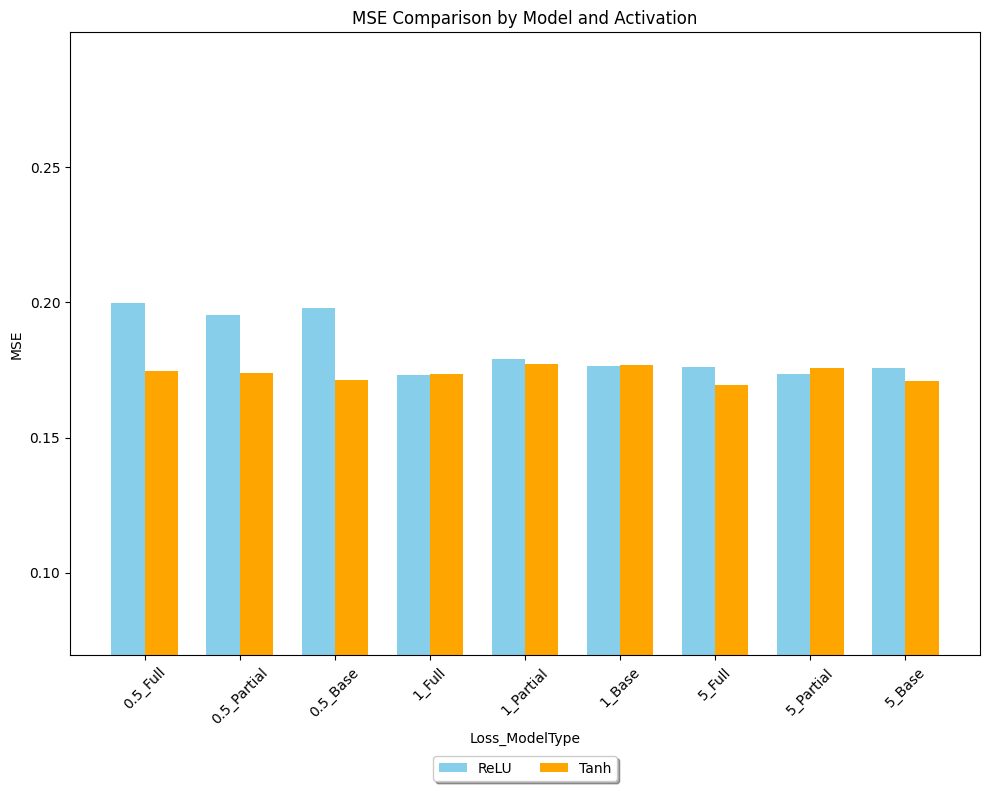

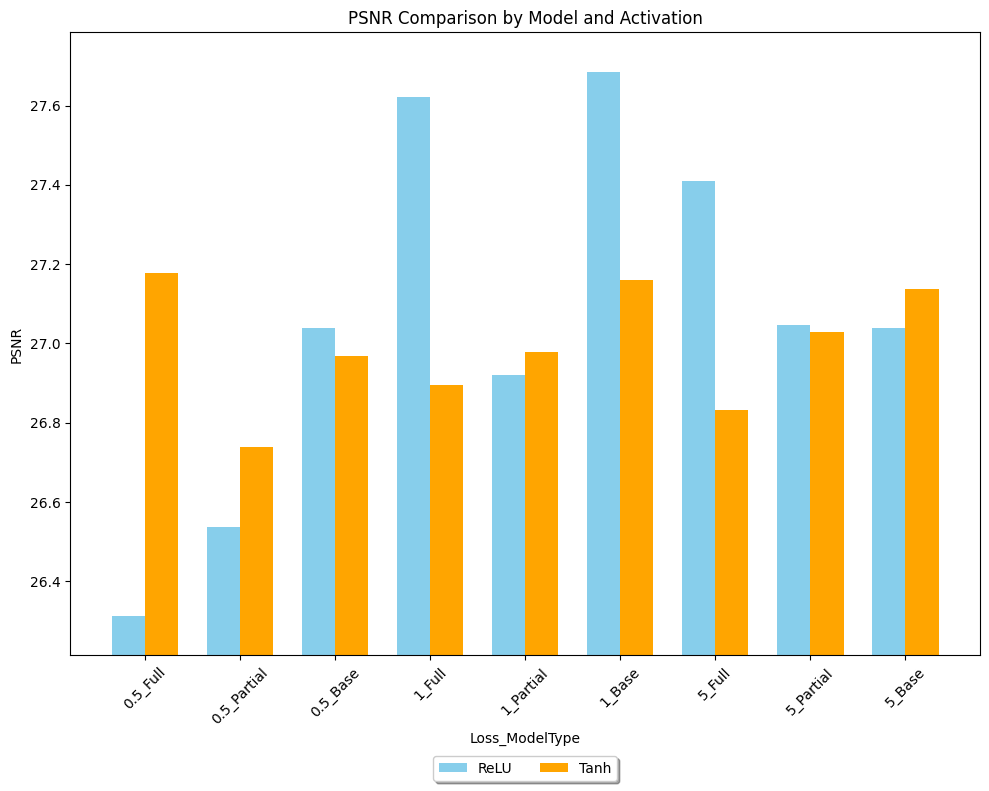

In [1375]:
def plot_metric_comparison(df, metric):
    # Filter the DataFrame for the given metric
    metric_df = df[df['Metric'] == metric]
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Get unique combinations of Loss and Model_Type for x-tick labels
    unique_combinations = metric_df['Loss'] + '_' + metric_df['Model_Type']
    unique_combinations = unique_combinations.unique()
    
    # Define bar width and the number of unique combinations
    bar_width = 0.35
    n_combinations = len(unique_combinations)
    
    # Define the positions of the ReLU and Tanh bars
    relu_positions = np.arange(n_combinations)
    tanh_positions = [x + bar_width for x in relu_positions]

    # Plotting the bars
    relu_bars = metric_df[metric_df['Activation'] == 'ReLU']['Value']
    tanh_bars = metric_df[metric_df['Activation'] == 'Tanh']['Value']
    
    ax.bar(relu_positions, relu_bars, width=bar_width, label='ReLU', color='skyblue')
    ax.bar(tanh_positions, tanh_bars, width=bar_width, label='Tanh', color='orange')
    
    # Add the xticks, labels, and title
    ax.set_xlabel('Loss_ModelType')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison by Model and Activation')
    
    # Set the position of the x-ticks to be in the middle of the group bars
    ax.set_xticks([r + bar_width/2 for r in range(n_combinations)])
    ax.set_xticklabels(unique_combinations, rotation=45)

    # Adjust y-axis range to show more values
    ax.set_ylim([min(metric_df['Value']) - 0.1, max(metric_df['Value']) + 0.1])

    # Adding the legend outside of the plot area
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    plt.tight_layout()
    plt.show()

# Plot each metric separately
for metric in ['SSIM', 'MSE', 'PSNR']:
    plot_metric_comparison(df, metric)


/tmp/ipykernel_3534653/2458439263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df.sort_values(by=['Loss', 'Model_Type', 'Activation'], inplace=True)


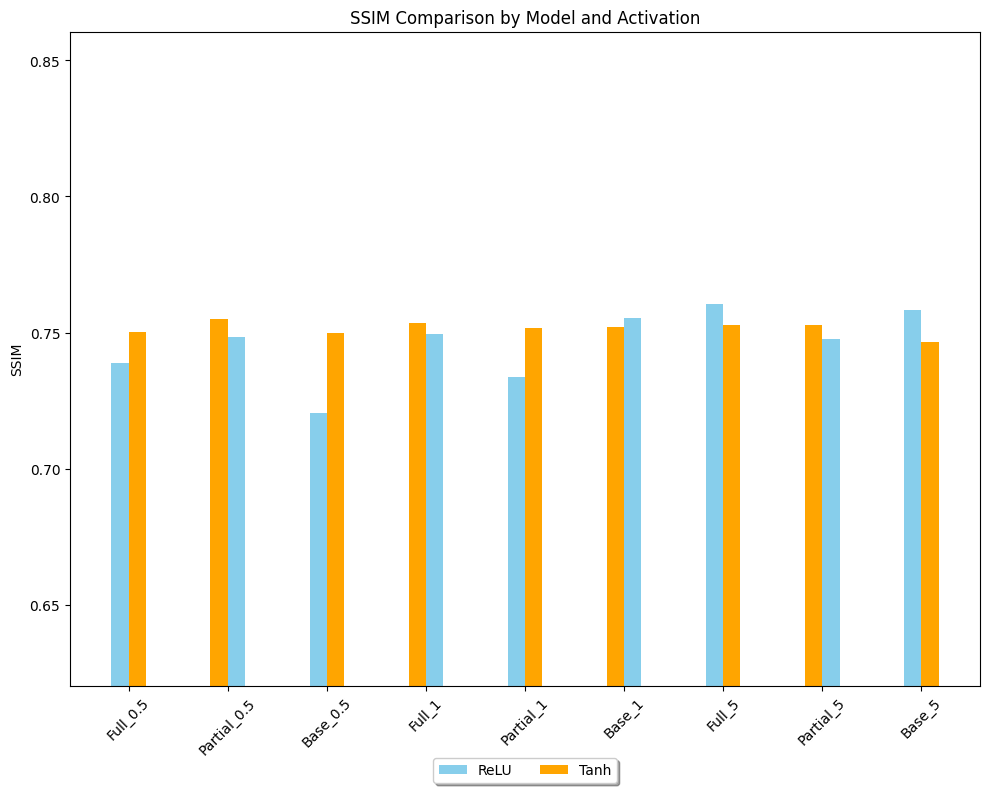

/tmp/ipykernel_3534653/2458439263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df.sort_values(by=['Loss', 'Model_Type', 'Activation'], inplace=True)


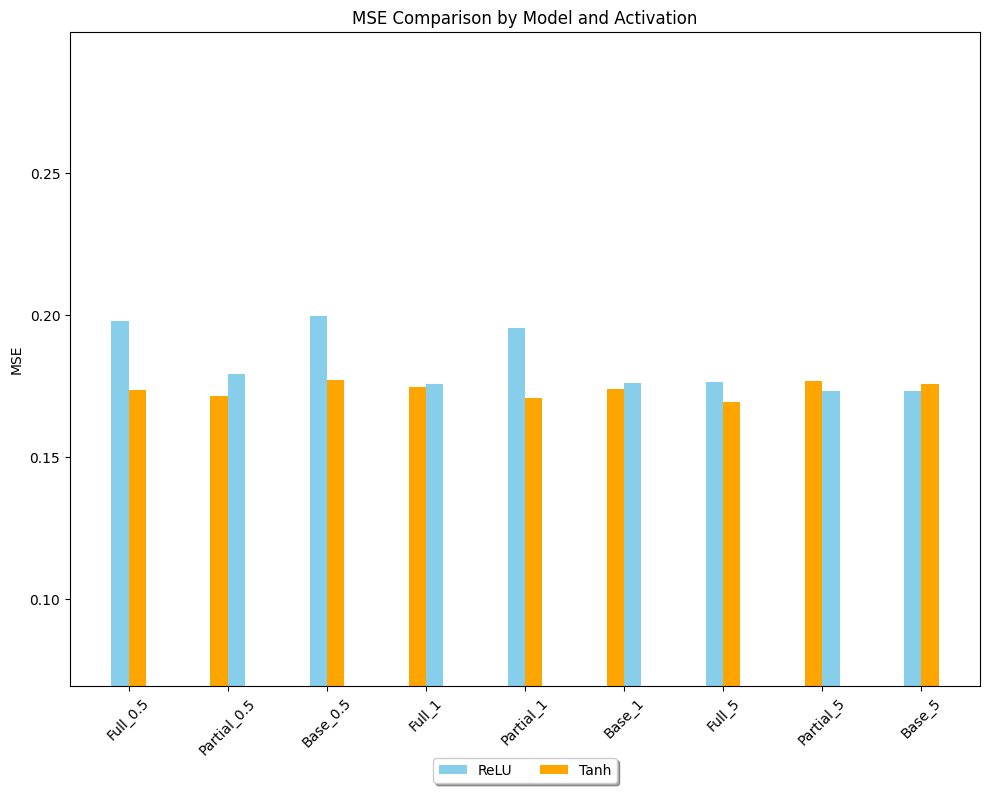

/tmp/ipykernel_3534653/2458439263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_df.sort_values(by=['Loss', 'Model_Type', 'Activation'], inplace=True)


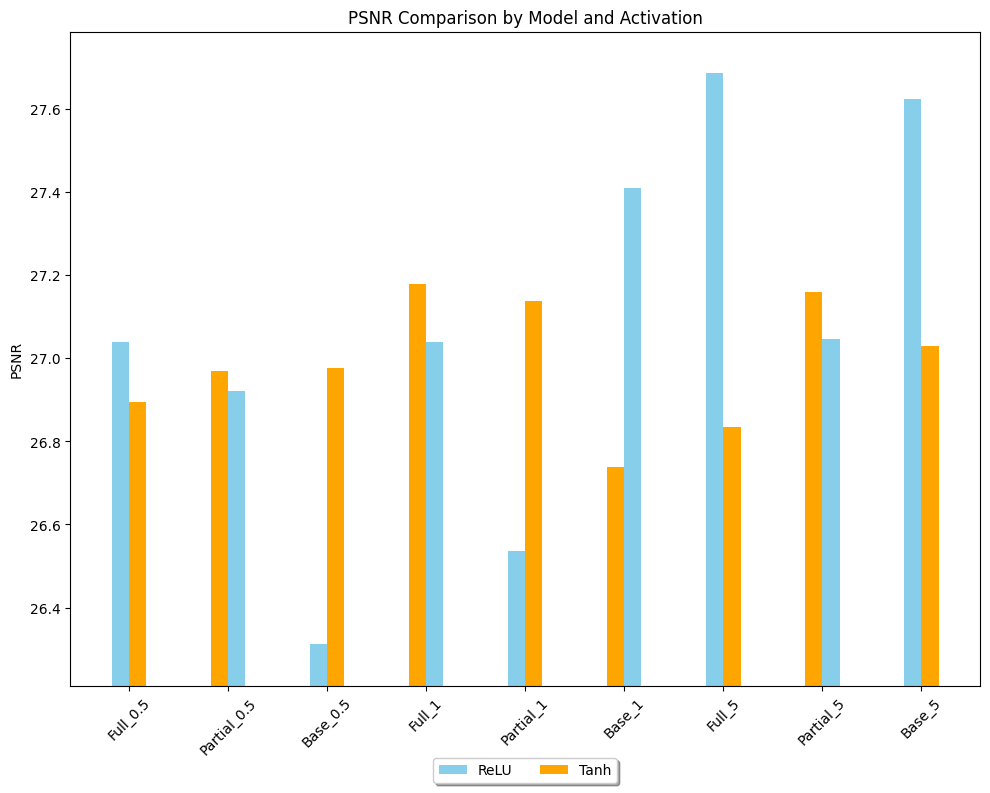

In [868]:
def plot_metric_comparison(df, metric):
    # Filter the DataFrame for the given metric
    metric_df = df[df['Metric'] == metric]
    
    # Sort the DataFrame for consistent bar ordering
    metric_df.sort_values(by=['Loss', 'Model_Type', 'Activation'], inplace=True)
    
    # Define bar width and positions
    bar_width = 0.35
    index = np.arange(0, len(metric_df['Loss'].unique()) * 6, 2)  # 6 positions for each loss weight
    bar_positions = np.concatenate([index + i * bar_width for i in range(2)])  # Two bars side by side for each model

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plotting the bars
    ax.bar(bar_positions[::2], metric_df[metric_df['Activation'] == 'ReLU']['Value'], bar_width, label='ReLU', color='skyblue')
    ax.bar(bar_positions[1::2], metric_df[metric_df['Activation'] == 'Tanh']['Value'], bar_width, label='Tanh', color='orange')
    
    # Add the xticks, labels, and title
    ax.set_xlabel('Model and Loss Weight')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison by Model and Activation')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f'{model}_{loss}' for loss in metric_df['Loss'].unique() for model in ['Full', 'Partial', 'Base']])
    ax.set_ylim([min(metric_df['Value']) - 0.1, max(metric_df['Value']) + 0.1])  # Adjust y-axis range to show more values

    # Adding the legend outside of the plot area
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot and save each metric separately
for metric in ['SSIM', 'MSE', 'PSNR']:
    plot_metric_comparison(df, metric)


In [ ]:
# tc1_base = model_base.predict(a)
# tc1_part = model_part.predict(a)
# tc1_full = model_full.predict(a)

In [ ]:

# Create a figure and axis objects for subplots with 2 rows and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 12))  # Adjusted for 2 rows
s = 51

# First row for ReLU images
axes[0].imshow(tc1_part[s, :, :, 0], cmap='gray')
# axes[0].set_title('CL partial decoder (ReLU)')
axes[0].axis('off')  # Turn off the axis

axes[1].imshow(tc1_full[s, :, :, 0], cmap='gray')
# axes[1].set_title('CL full decoder (ReLU)')
axes[1].axis('off')  # Turn off the axis

axes[2].imshow(tc1_base[s, :, :, 0], cmap='gray')
# axes[2].set_title('Baseline (ReLU)')
axes[2].axis('off')  # Turn off the axis

axes[3].imshow(b[s, :, :, 0], cmap='gray')
# axes[3].set_title('Original')
axes[3].axis('off')  # Turn off the axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# import numpy as np
# import tensorflow as tf

# # Select the 'T1-weighted' image
# t1_weighted = images['T2-FLAIR']

# # Choose a slice; for example, the middle slice
# slice_index = 100  # Assuming the third dimension is the slice dimension
# selected_slice = t1_weighted[:, :, slice_index]
# selected_slice = np.rot90(selected_slice, k=-1)

# # Expand dimensions of the slice to make it 3D, which is expected by tf.image.resize
# selected_slice_expanded = np.expand_dims(selected_slice, axis=-1)

# # Resize the image slice to match the input size expected by your VGG model
# resized_slice = tf.image.resize(selected_slice_expanded, [192, 192])

# # Convert to 3 channels by replicating the slice across the color channels
# three_channel_slice = tf.repeat(resized_slice, repeats=3, axis=-1)

# # Expand dimensions to add a batch dimension for model input
# input_slice = np.expand_dims(three_channel_slice, axis=0)


In [ ]:
# import math
# import matplotlib.pyplot as plt

# def plot_feature_maps(feature_maps, grid_size=8):
#     # If grid_size is None, it is set to the default value of 16
#     # So the condition checking if grid_size is None is not necessary
#     fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))
    
#     # Reduce the space between subplots here
#     plt.subplots_adjust(wspace=0.1, hspace=0.1)

#     for i, ax in enumerate(axes.flat):
#         if i < feature_maps.shape[-1]:
#             ax.imshow(feature_maps[0, :, :, i], cmap='gray')
#             ax.axis('off')  # Hides the axis
#         else:
#             ax.axis('off')  # Ensures that the rest of the plots do not have an axis

#     plt.show()

# # Example usage
# plot_feature_maps(feature_maps)
